Average Stock Price 1 Week Before Announcement (March 4–10): 29.29
Announcement Occured on March 11, 2025
Average Stock Price 1 Week After Announcement (March 11–18): 31.28
Increase of 6.81%


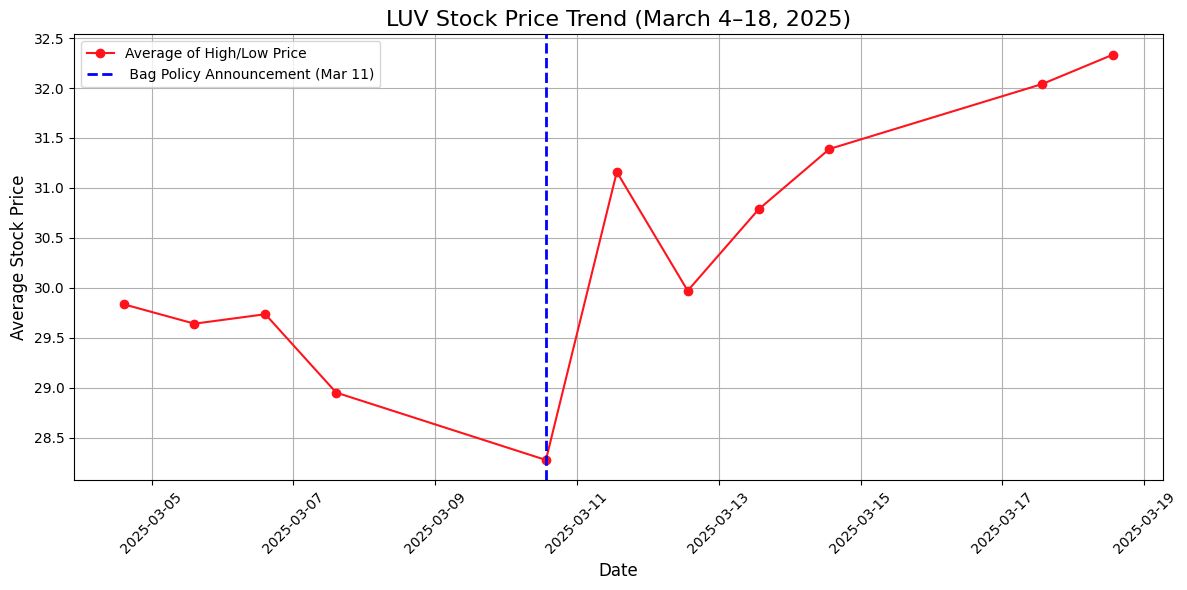

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import time


start_date = datetime(2025, 3, 4)
end_date = datetime(2025, 3, 19)

period1 = int(time.mktime(start_date.timetuple()))
period2 = int(time.mktime(end_date.timetuple()))

url = f"https://query1.finance.yahoo.com/v8/finance/chart/LUV?interval=1d&period1={period1}&period2={period2}"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
data = response.json()

timestamps = data["chart"]["result"][0]["timestamp"]
quotes = data["chart"]["result"][0]["indicators"]["quote"][0]

df = pd.DataFrame(quotes)
df["date"] = [datetime.fromtimestamp(ts) for ts in timestamps]
df.set_index("date", inplace=True)
df["avg_high_low"] = (df["high"] + df["low"]) / 2

range1 = df.loc["2025-03-04":"2025-03-10"]
range2 = df.loc["2025-03-11":"2025-03-18"]
avg1 = range1["avg_high_low"].mean()
avg2 = range2["avg_high_low"].mean()
percent_change = ((avg2 - avg1) / avg1) * 100

print("Average Stock Price 1 Week Before Announcement (March 4–10):", round(avg1, 2))
print("Announcement Occured on March 11, 2025")
print("Average Stock Price 1 Week After Announcement (March 11–18):", round(avg2, 2))
print(f"Increase of {round(percent_change, 2)}%")

plt.figure(figsize=(12, 6))
plt.plot(df.index, df["avg_high_low"], marker='o', linestyle='-', color = '#ff141d', label='Average of High/Low Price')

announcement_target = datetime(2025, 3, 11)
closest_announcement_date = df.index.get_indexer([announcement_target], method='nearest')
announcement_date_real = df.index[closest_announcement_date][0]

plt.axvline(announcement_date_real, color='blue', linestyle='--', linewidth=2, label=' Bag Policy Announcement (Mar 11)')

plt.title("LUV Stock Price Trend (March 4–18, 2025)", fontsize=16)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Stock Price", fontsize=12)
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

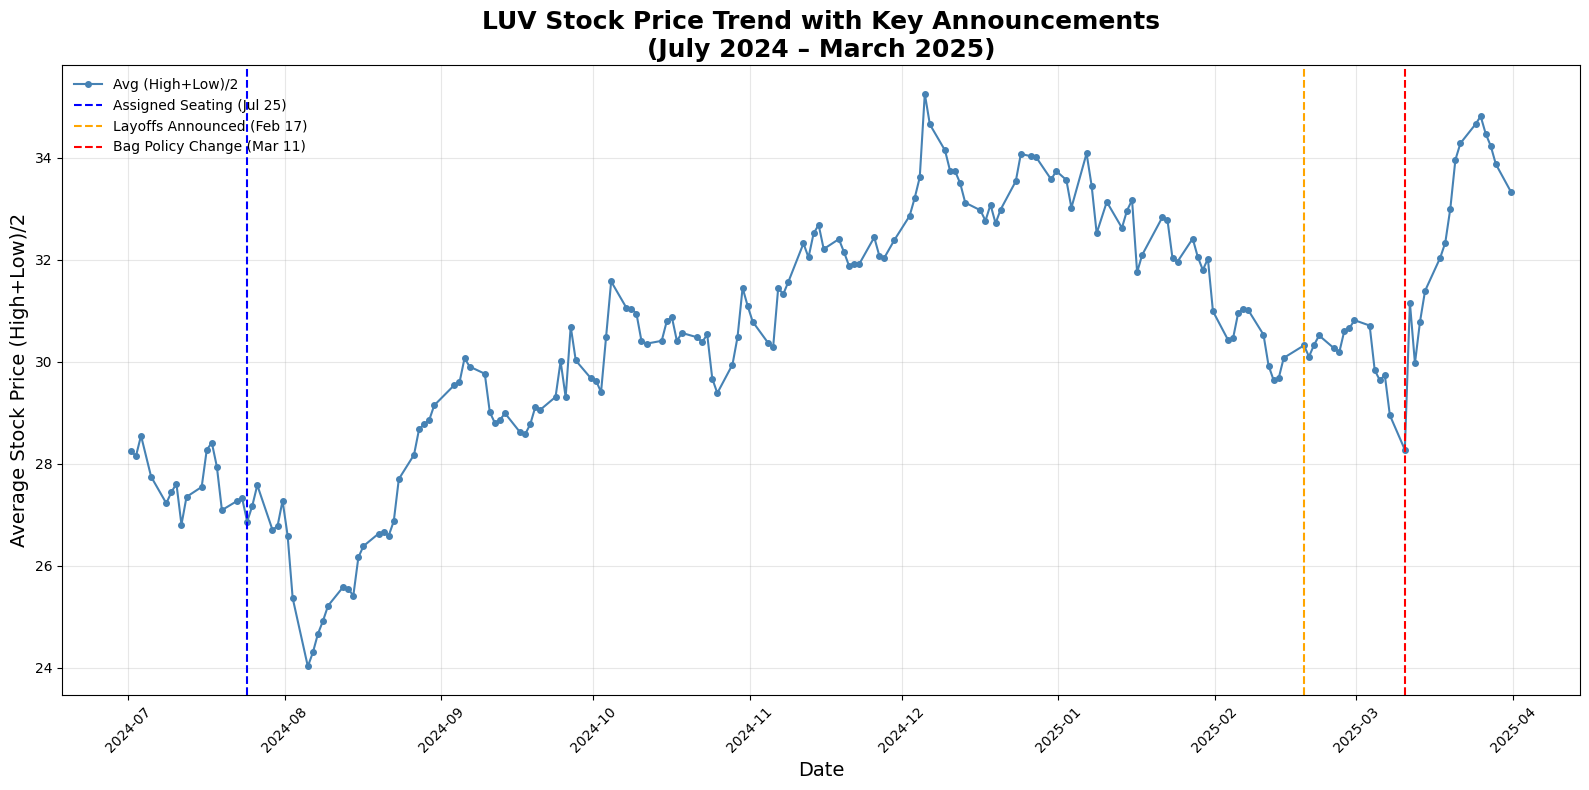

In [3]:

start_date = datetime(2024, 7, 1)
end_date = datetime(2025, 4, 1)

period1 = int(time.mktime(start_date.timetuple()))
period2 = int(time.mktime(end_date.timetuple()))

url = f"https://query1.finance.yahoo.com/v8/finance/chart/LUV?interval=1d&period1={period1}&period2={period2}"
headers = {
    "User-Agent": "Mozilla/5.0"
}

response = requests.get(url, headers=headers)
data = response.json()

timestamps = data["chart"]["result"][0]["timestamp"]
quotes = data["chart"]["result"][0]["indicators"]["quote"][0]

df = pd.DataFrame(quotes)
df["date"] = [datetime.fromtimestamp(ts) for ts in timestamps]
df.set_index("date", inplace=True)
df["avg_high_low"] = (df["high"] + df["low"]) / 2

plt.figure(figsize=(16, 8))
plt.plot(df.index, df["avg_high_low"], marker='o', markersize=4, linestyle='-', color='steelblue', label='Avg (High+Low)/2')

assigned_seating_target = datetime(2024, 7, 25)
layoff_announcement_target = datetime(2025, 2, 17)
bag_policy_change_target = datetime(2025, 3, 11)

assigned_seating_date = df.index[df.index.get_indexer([assigned_seating_target], method='nearest')][0]
layoff_date_real = df.index[df.index.get_indexer([layoff_announcement_target], method='nearest')][0]
bag_policy_change_date_real = df.index[df.index.get_indexer([bag_policy_change_target], method='nearest')][0]

plt.axvline(assigned_seating_date, color='blue', linestyle='--', linewidth=1.5, label='Assigned Seating (Jul 25)')
plt.axvline(layoff_date_real, color='orange', linestyle='--', linewidth=1.5, label='Layoffs Announced (Feb 17)')
plt.axvline(bag_policy_change_date_real, color='red', linestyle='--', linewidth=1.5, label='Bag Policy Change (Mar 11)')

plt.title("LUV Stock Price Trend with Key Announcements\n(July 2024 – March 2025)", fontsize=18, weight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Average Stock Price (High+Low)/2", fontsize=14)

plt.grid(alpha=0.3)
plt.legend(fontsize=10, loc='upper left', frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


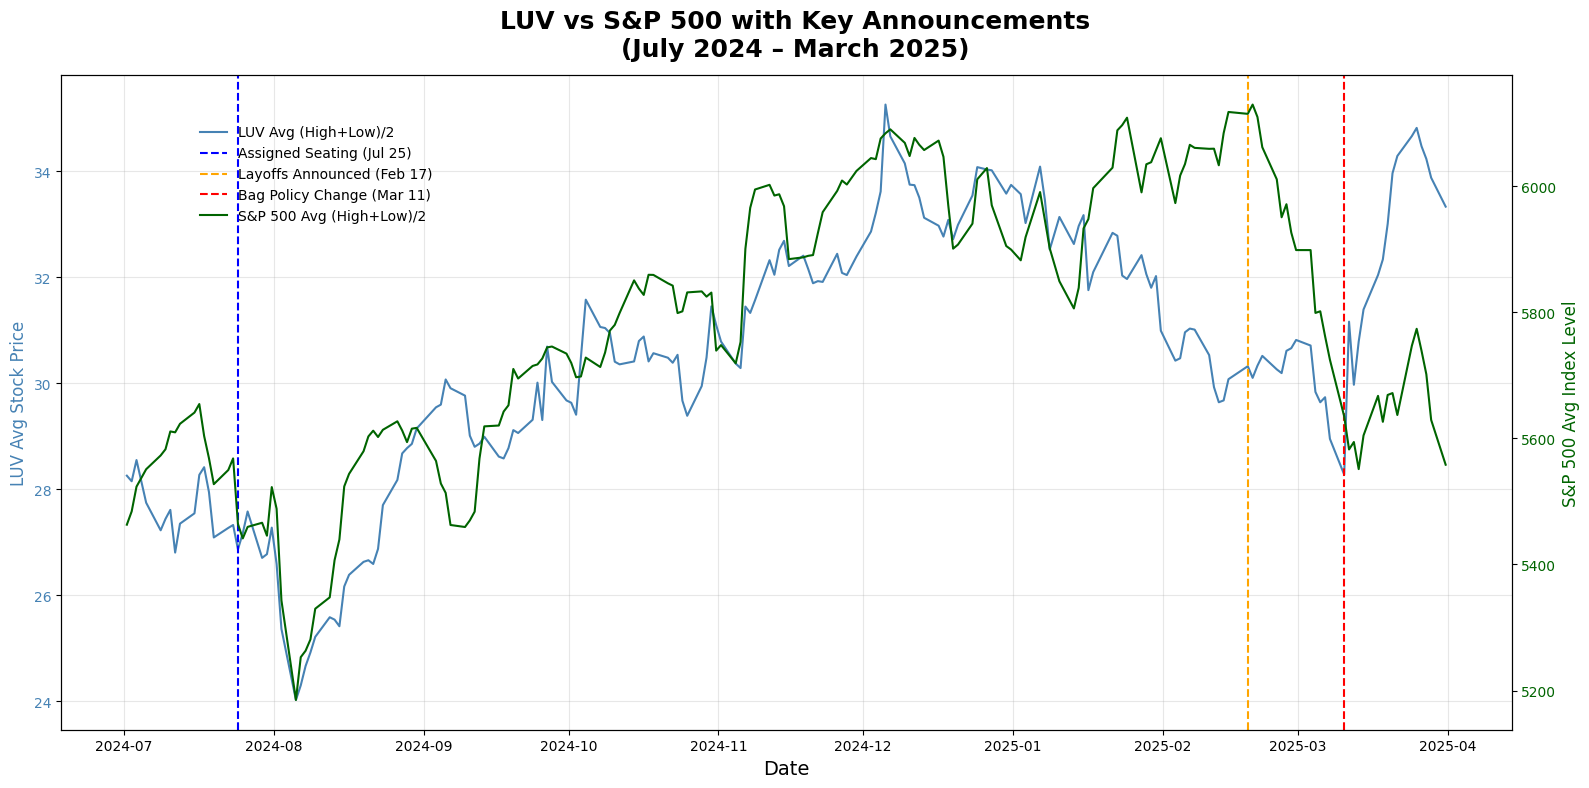

In [ ]:

def fetch_yahoo_data(ticker, period1, period2):
    url = f"https://query1.finance.yahoo.com/v8/finance/chart/{ticker}?interval=1d&period1={period1}&period2={period2}"
    headers = {"User-Agent": "Mozilla/5.0"}
    response = requests.get(url, headers=headers)
    data = response.json()

    timestamps = data["chart"]["result"][0]["timestamp"]
    quotes = data["chart"]["result"][0]["indicators"]["quote"][0]

    df = pd.DataFrame(quotes)
    df["date"] = [datetime.fromtimestamp(ts) for ts in timestamps]
    df.set_index("date", inplace=True)
    df["avg_high_low"] = (df["high"] + df["low"]) / 2
    return df

# Date range setup
start_date = datetime(2024, 7, 1)
end_date = datetime(2025, 4, 1)
period1 = int(time.mktime(start_date.timetuple()))
period2 = int(time.mktime(end_date.timetuple()))

# Fetch data
sp500_df = fetch_yahoo_data("^GSPC", period1, period2)
luv_df = fetch_yahoo_data("LUV", period1, period2)

# Plotting with twin axes
fig, ax1 = plt.subplots(figsize=(16, 8))

# Secondary y-axis for S&P 500
ax2 = ax1.twinx()
ax2.plot(sp500_df.index, sp500_df["avg_high_low"], color='darkgreen', label='S&P 500 Avg (High+Low)/2', zorder=1)
ax2.set_ylabel("S&P 500 Avg Index Level", fontsize=12, color='darkgreen')
ax2.tick_params(axis='y', labelcolor='darkgreen')

# Primary y-axis for LUV (plotted after S&P to appear on top)
ax1.plot(luv_df.index, luv_df["avg_high_low"], color='steelblue', label='LUV Avg (High+Low)/2', zorder=2)
ax1.set_ylabel("LUV Avg Stock Price", fontsize=12, color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')

# Mark key LUV events
key_dates = {
    "Assigned Seating (Jul 25)": datetime(2024, 7, 25),
    "Layoffs Announced (Feb 17)": datetime(2025, 2, 17),
    "Bag Policy Change (Mar 11)": datetime(2025, 3, 11)
}
colors = ['blue', 'orange', 'red']
for (label, date), color in zip(key_dates.items(), colors):
    nearest_date = luv_df.index[luv_df.index.get_indexer([date], method='nearest')][0]
    ax1.axvline(nearest_date, color=color, linestyle='--', linewidth=1.5, label=label)

# Final formatting
fig.suptitle("LUV vs S&P 500 with Key Announcements\n(July 2024 – March 2025)", fontsize=18, weight='bold')
ax1.set_xlabel("Date", fontsize=14)
ax1.grid(alpha=0.3)
fig.legend(loc="upper left", bbox_to_anchor=(0.12, 0.85), fontsize=10, frameon=False)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
